# EGT207- Machine Learning Project


##### Problem Statement: Given the Inputs, detect if the patient is Healthy or has Parkinson's Disease

## Cleaning the Dataset 

### Importing Relevant Libraries

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import pickle

#supress any warnings about too few trees
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)



### Loading the Dataset

In [8]:
## Loading Dataset 

parkinson_df = pd.read_csv('parkinson_disease_assignment - Copy.csv')

parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,L


In [9]:
parkinson_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'DCAT'],
      dtype='object')

1.	name: The identifier of the voice recording for each individual.
2.	MDVP:Fo(Hz): Average vocal fundamental frequency.
3.	MDVP:Fhi(Hz): Maximum vocal fundamental frequency.
4.	MDVP:Flo(Hz): Minimum vocal fundamental frequency.
5.	MDVP:Jitter(%): Measure of variation in fundamental frequency.
6.	MDVP:Jitter(Abs): Absolute measure of variation in fundamental frequency.
7.	MDVP:RAP: Relative average perturbation, another measure of frequency variation.
8.	MDVP:PPQ: Five-point period perturbation quotient.
9.	Jitter:DDP: Average absolute difference of differences between periods.
10.	MDVP:Shimmer: Measure of variation in amplitude.
11.	MDVP:Shimmer(dB): Another measure of variation in amplitude in decibels.
12.	Shimmer:APQ3: Three-point amplitude perturbation quotient.
13.	Shimmer:APQ5: Five-point amplitude perturbation quotient.
14.	MDVP:APQ: Eleven-point amplitude perturbation quotient.
15.	Shimmer:DDA: Average absolute difference of differences between amplitudes.
16.	NHR: Noise-to-harmonics ratio.
17.	HNR: Harmonics-to-noise ratio.
18.	status: Health status of the subject (1 = Parkinson’s, 0 = healthy).
19.	RPDE: Recurrence period density entropy, a nonlinear dynamical complexity measure.
20.	DFA: Detrended fluctuation analysis, another measure of signal complexity.
21.	spread1: Nonlinear measure of fundamental frequency variation.
22.	spread2: Nonlinear measure of fundamental frequency variation.
23.	D2: Correlation dimension, a measure of signal complexity.
24.	PPE: Pitch period entropy, a measure of variation in pitch period.
25.	DCAT: Data category label (e.g., ‘N’ for Normal, ‘L’ for Low, ‘M’ for Medium).

### Removal of NULL Values

In [10]:
#remove missing values 

parkinson_missing = parkinson_df.isna().sum()


#removing parkinson_missing 

parkinson_df = parkinson_df.dropna()


### Removal of Duplicate Values

In [11]:
#checking for duplicated and removing them 

parkinson_duplicated = parkinson_df.duplicated().sum()

print(f"{parkinson_duplicated}")

0


## Exploratory Data Analysis and Visualization

### Observing Outliers

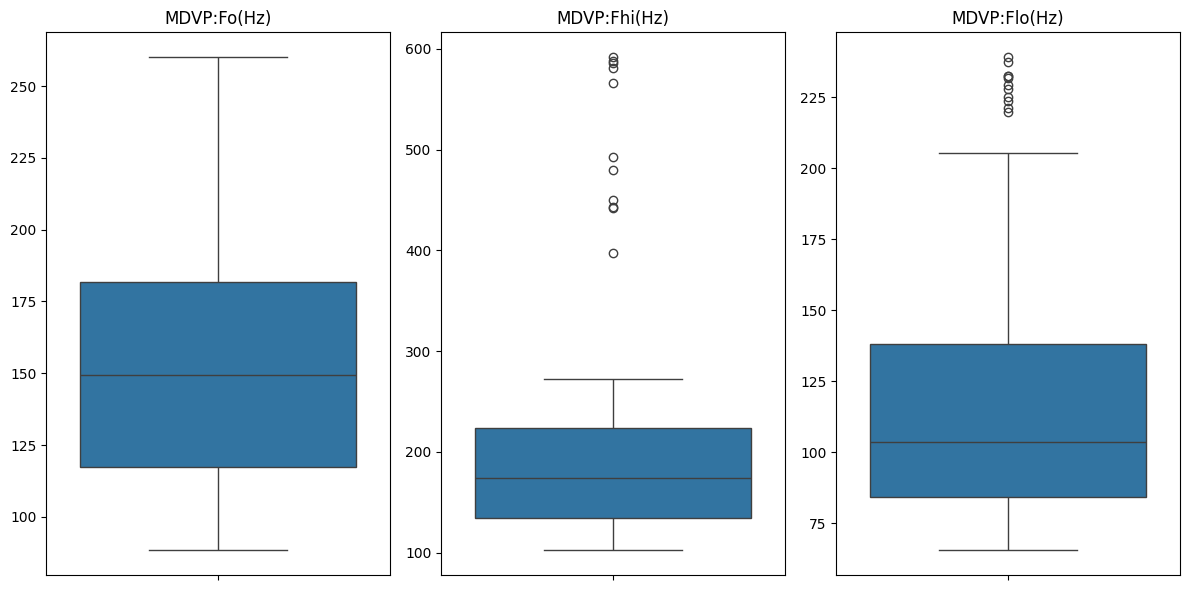

In [12]:
#find out the outliers by plotting Box-Plot using sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))


sns.boxplot(parkinson_df['MDVP:Fo(Hz)'], ax=ax1)
ax1.set_title('MDVP:Fo(Hz)')
ax1.set_ylabel('')

sns.boxplot(parkinson_df['MDVP:Fhi(Hz)'], ax=ax2)
ax2.set_title('MDVP:Fhi(Hz)')
ax2.set_ylabel('')

sns.boxplot(parkinson_df['MDVP:Flo(Hz)'], ax=ax3)
ax3.set_title('MDVP:Flo(Hz)')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()


### Plotting the Frequency Signals

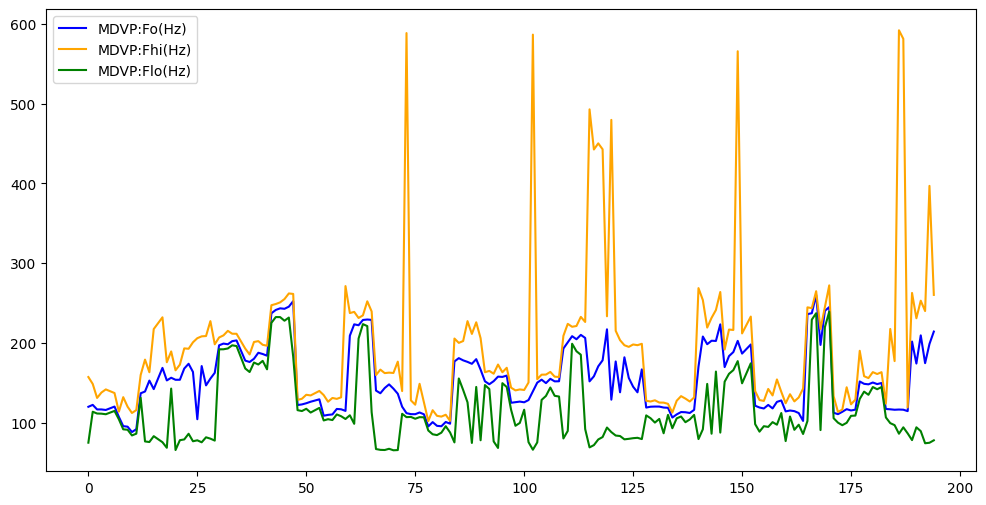

In [13]:
#plotting box plots in line graphs 

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(parkinson_df['MDVP:Fo(Hz)'], label='MDVP:Fo(Hz)', color='blue')
ax.plot(parkinson_df['MDVP:Fhi(Hz)'], label='MDVP:Fhi(Hz)', color='orange')
ax.plot(parkinson_df['MDVP:Flo(Hz)'], label='MDVP:Flo(Hz)', color='green')

ax.legend()
plt.show()

### Dataset Analysis - Breakdown of Target Data (Status Column)

/var/folders/wv/lgt7rwvx5dn_v1y74zftwswh0000gn/T/ipykernel_25984/1065276197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=parkinson_df, palette='Set2')


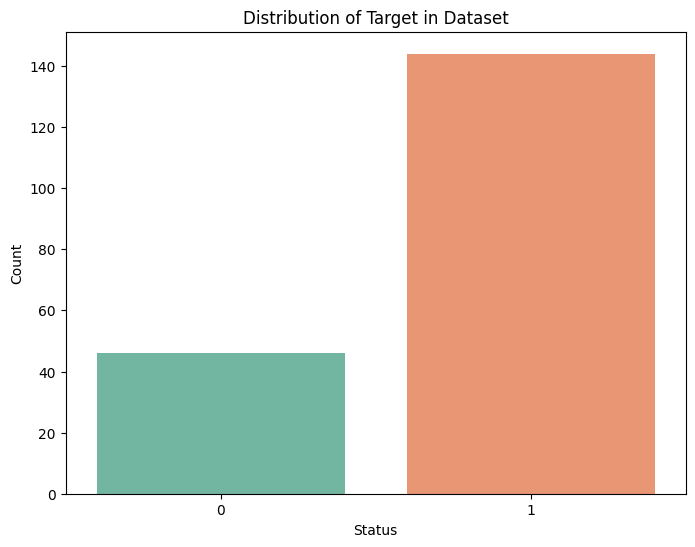

In [14]:
#Visualize a bar chart for the status column

plt.figure(figsize=(8,6))
sns.countplot(x='status', data=parkinson_df, palette='Set2')
plt.title('Distribution of Target in Dataset')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [15]:
#creating pie chart 

status_count = parkinson_df['status'].value_counts()
status_target = ['Unhealthy', 'Healthy']

fig = px.pie(names=status_target, values=status_count, title='Distribution of Targets', color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

Observation of the Pie Chart: We can see that 75.8% of the status columns depict Parkinson's Disease whereas 24.2% depict no Parkinson's Disease. We can see that over here the data is skewed towards the Parkinson's Disease Class and that the ratio between Unhealthy and Healthy is 3.13:1 

***(hover your mouse over the pie to see the label)***

The Model may be biased towards predicting the majority class as during the validation process, it sees more of the "Unhealthy" class. Moreover, the model may also not to be able to identiy the Healthy Class which may result in a lower recall, f1 score for this class, which may lead to some Healthy individuals being classfied as unhealthy.

### Removing Unnecessary Columns

In [16]:
columns_to_remove = ['name', 'DCAT']

parkinson_df = parkinson_df.drop(columns=columns_to_remove, axis=1)

parkinson_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Planting the Decision Tree

In [17]:
parkinson_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Splitting the dataset

The dataset was split into 3 sets - Training, Validation and Test Sets. The rationale behind doing this is to prevent the machine from memorising the dataset and to make allow the model to generalise the data. 

Training Set: The purpose of this set is to allow the Model to learn from the data i.e. training the model. 
Validation Set: The purpose of this set is to tune the hyperparameters of the model to improve the accuracy of the model.
Test Set: The purpose of this set is to evaluate the performance of the model on unseen data and checking the correct and final accuracy of the model. 

If the validation set was not used, The model will be exposed to the same test set over and over again during the hyperparameter fine tuning process. The problem with this is the model will be seeing the dataset too many times resulting in the data being unseen, and the model memorising the data. 

For us to have a better understanding of the performance of the model we split it into three sets as described above

In [18]:
# features and targets
features = parkinson_df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']]

target = parkinson_df[['status']]

#split data into three sets 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print("\n")
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)
print("\n")
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train:  (152, 22)
y_train:  (152, 1)


X_test:  (19, 22)
y_test:  (19, 1)


X_val: (19, 22)
y_val: (19, 1)


### Building the Decision Tree Model

In [38]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Getting the Most Important Features

In [39]:
important_features = {} #empty dic

feature_names = list(features.columns)

feature_importances = list(clf.feature_importances_)

temp = {'feature': feature_names, 'feature_importance': feature_importances}

impt_features_df = pd.DataFrame(temp)
impt_features_df

#getting the top values 

impt_features_df.sort_values(by='feature_importance', ascending=False, inplace=True)
impt_features_df

,feature,feature_importance
18,spread1,0.476287
0,MDVP:Fo(Hz),0.202699
1,MDVP:Fhi(Hz),0.103199
16,RPDE,0.059369
8,MDVP:Shimmer,0.058398
21,PPE,0.034294
14,NHR,0.031656
3,MDVP:Jitter(%),0.017861
19,spread2,0.016238
6,MDVP:PPQ,0.000000


There are 11 most important features are: 

- spread1
- MDVP:Fo(Hz)	
- MDVP:Fhi(Hz)	
- RPDE	
- MDVP:Shimmer	
- PPE	
- NHR	
- MDVP:Shimmer(dB)	
- MDVP:RAP
- MDVP:APQ
- spread2

In [40]:
# Run on Validation Set

val_accuracy = clf.score(X_val, y_val)

print(f"The Accuracy of the Model on the Validation Set: {val_accuracy}")


The Accuracy of the Model on the Validation Set: 0.8421052631578947


In [103]:
preds = clf.predict(X_val)

dt_accuracy = accuracy_score(y_val, preds)
dt_report = classification_report(y_val, preds)

print(f"The decision tree accuracy is {dt_accuracy} \n")
print(f"The decison tree classification report is \n\n {dt_report}")

The decision tree accuracy is 0.8421052631578947 

The decison tree classification report is 

               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



Define f1-score:


The Model that was tested on the Validation Set has a 84.21% Accuracy, because the  We can further improve this accuracy by fine tuning the hyperparameters and testing it on the test set

### Visualisation Of The Decision Tree

In [41]:
text_representation = tree.export_text(clf)

print(text_representation)

|--- feature_18 <= -6.65
|   |--- feature_16 <= 0.34
|   |   |--- feature_1 <= 230.49
|   |   |   |--- class: 1
|   |   |--- feature_1 >  230.49
|   |   |   |--- class: 0
|   |--- feature_16 >  0.34
|   |   |--- feature_19 <= 0.27
|   |   |   |--- class: 0
|   |   |--- feature_19 >  0.27
|   |   |   |--- feature_3 <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.00
|   |   |   |   |--- class: 0
|--- feature_18 >  -6.65
|   |--- feature_8 <= 0.02
|   |   |--- feature_0 <= 117.99
|   |   |   |--- feature_0 <= 112.35
|   |   |   |   |--- feature_1 <= 113.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  113.72
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  112.35
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  117.99
|   |   |   |--- feature_14 <= 0.03
|   |   |   |   |--- feature_21 <= 0.13
|   |   |   |   |   |--- feature_21 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  0.12
|   |  

In [49]:
clf.classes_

array([0, 1])

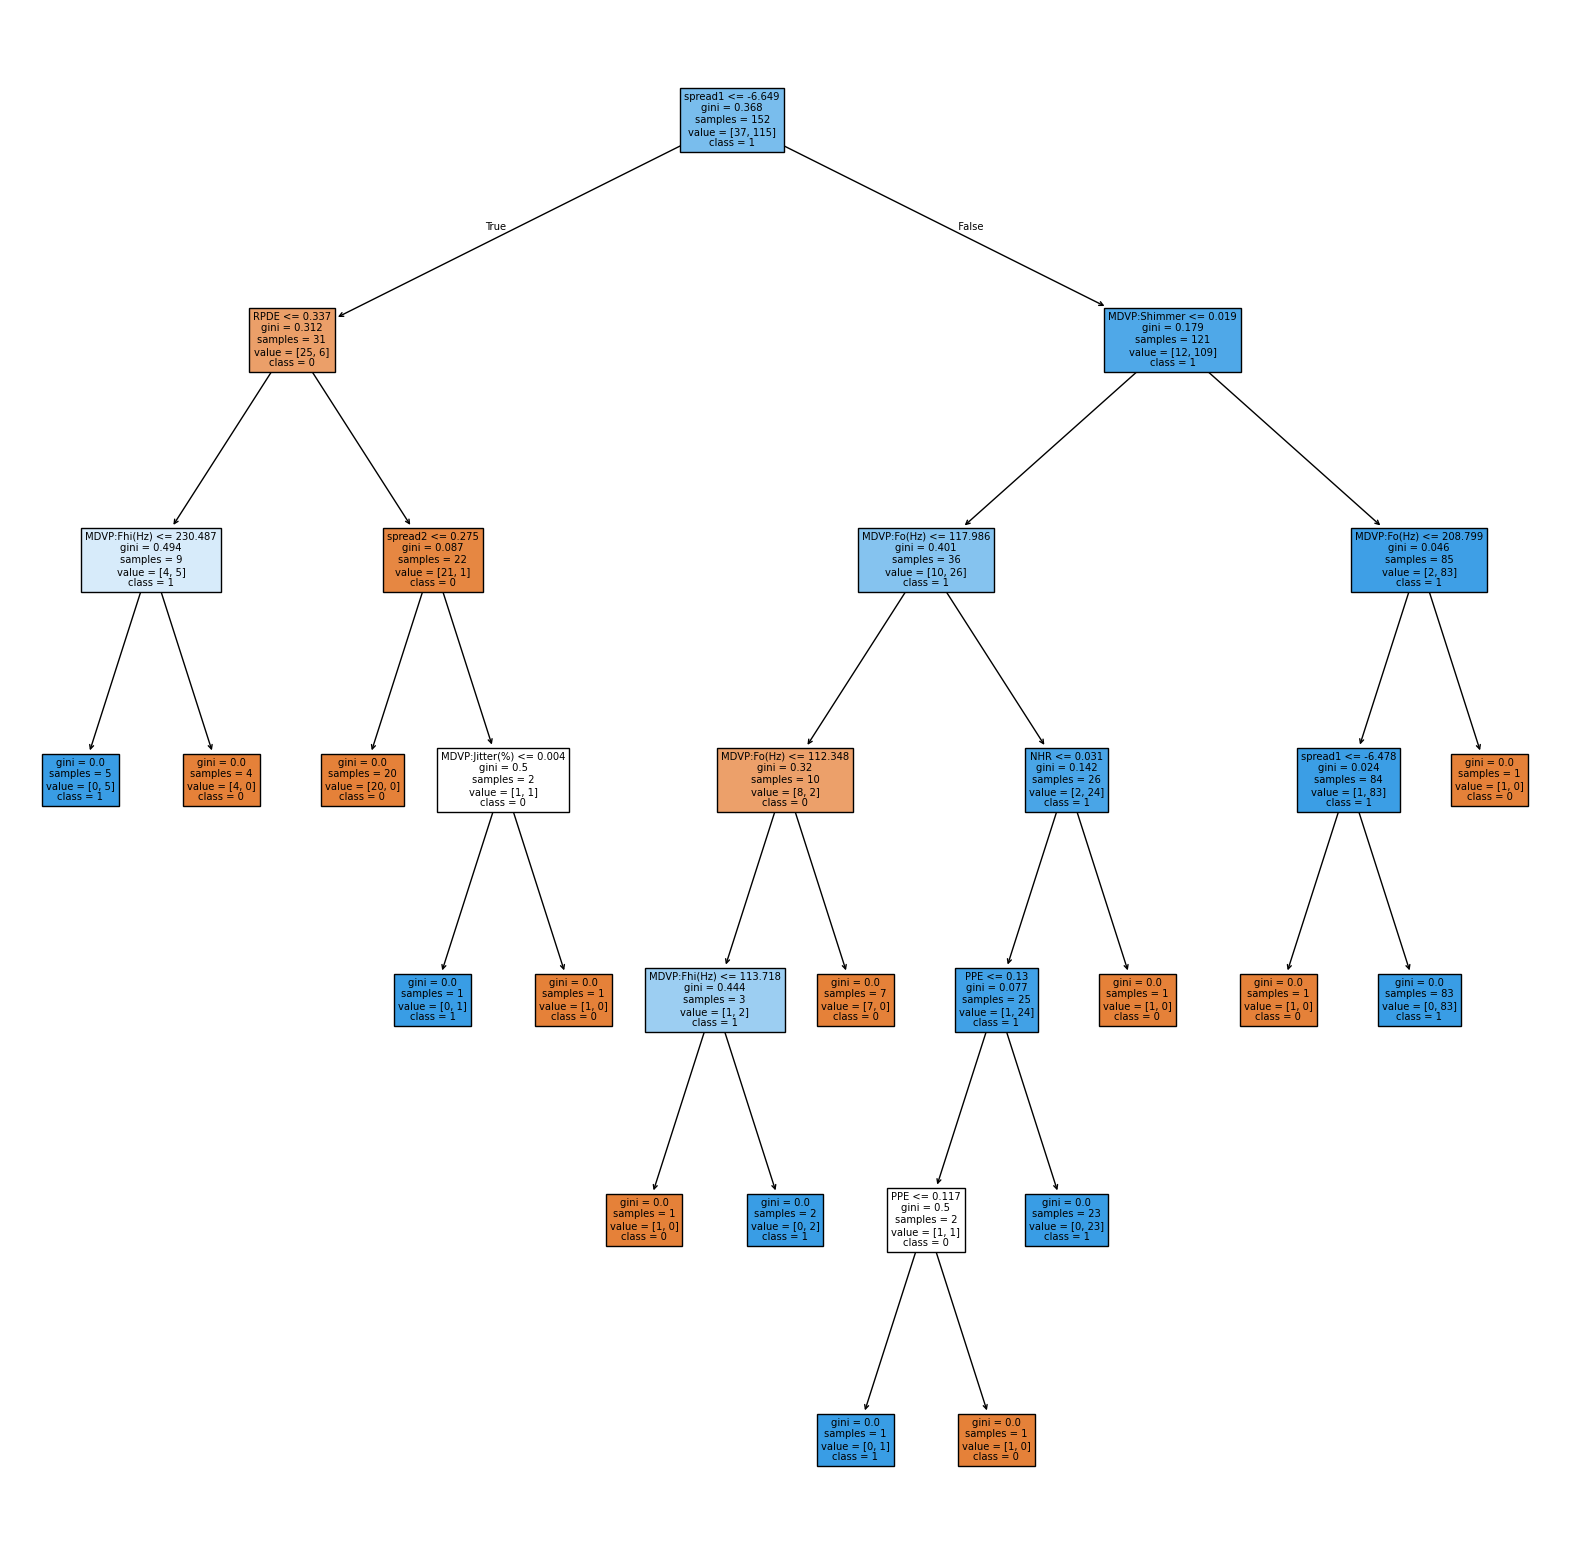

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(20,20))

plot_tree(clf, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()
plt.savefig("decision_tree.png")

## Fine Tune Hyperparameters

- max_depth:
Controls the maximum depth of the tree. A lower depth limits the tree from becoming too complex, which can help prevent overfitting.
Tuning this hyperparameter helps balance bias and variance in the model.

- min_samples_split:
The minimum number of samples required to split an internal node.
Increasing this value can prevent the tree from learning overly specific rules, which helps in controlling overfitting.

- min_samples_leaf:
The minimum number of samples required to be at a leaf node.
Ensures that leaf nodes contain a sufficient number of samples, which can make the model more generalizable.

- max_features:
The maximum number of features to consider when looking for the best split.
This can be a way to introduce randomness, particularly in ensemble methods like Random Forests, to make the model more robust.
criterion:
The function to measure the quality of a split. Common options are:

- gini: Gini impurity (used in classification).
entropy: Information gain (used in classification).

- mse: Mean squared error (used in regression).

- mae: Mean absolute error (used in regression).
Tuning this hyperparameter can affect the way the tree decides on splits.

- max_leaf_nodes:
The maximum number of leaf nodes in the tree.
Limits the number of leaf nodes to control the complexity of the tree.

- min_weight_fraction_leaf:
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
Useful when dealing with datasets that have varying sample weights.

- splitter:
The strategy used to choose the split at each node. Options include:

- best: Chooses the best split among all features.

- random: Chooses the best split among a random subset of features.

- random_state:
Controls the randomness of the estimator. Setting a random state ensures that the results are reproducible.

- ccp_alpha:
Complexity parameter used for Minimal Cost-Complexity Pruning.
Helps in pruning the tree after it has been fully grown, which can remove nodes that add little value and reduce the risk of overfitting.

#### Fine Tuning Round 1

In [70]:
#getting the max depth value 
clf1 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100)

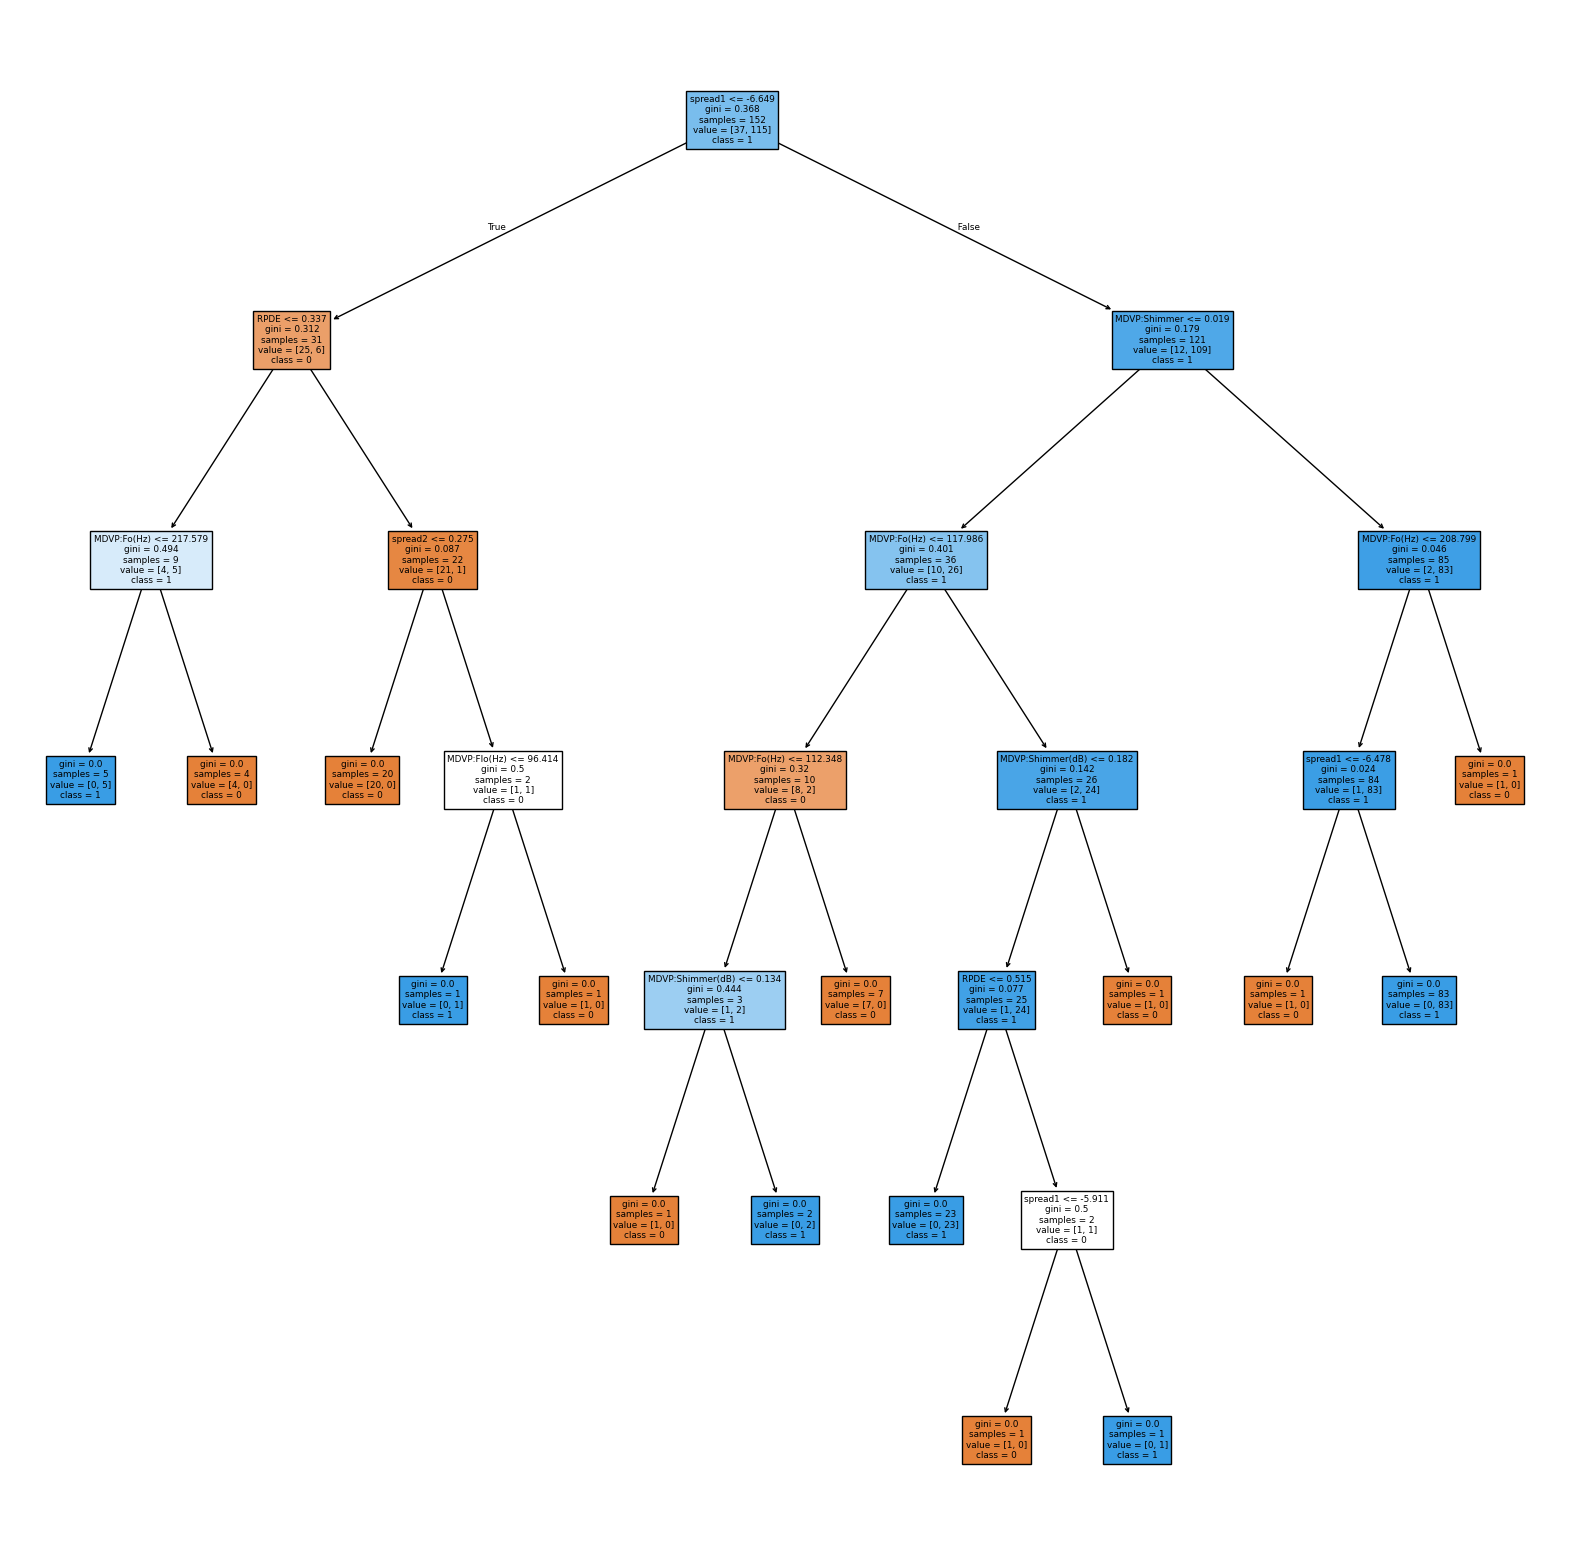

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(20,20))

plot_tree(clf1, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()
plt.savefig("decision_tree_1.png")

In [72]:
val_accuracy1 = clf1.score(X_val, y_val)

print(f"The Accuracy of the Decision Tree1 on the Validation Set: {val_accuracy1}")

The Accuracy of the Decision Tree1 on the Validation Set: 0.8947368421052632


As compared to previous round of training, the accuracy had improved to 89.5% as compared to 84.21%. This shows that putting the max_depth as 10 and the max_leaf_nodes as 100 improves the overall performance of the model. 

In [74]:
#saving the model as there was an accuracy increase
# Save the model to a file
with open('decision_tree1_model.pkl', 'wb') as file:
    pickle.dump(clf1, file)

Viewing the current parameters of the Decision Tree Model (clf1) as this has given the highest accuracy so far.

In [78]:
clf1_params = clf1.get_params()
clf1_params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

#### Fine Tuning Round 2

The Accuracy of the Decision Tree2 on the Validation Set: 0.8421052631578947


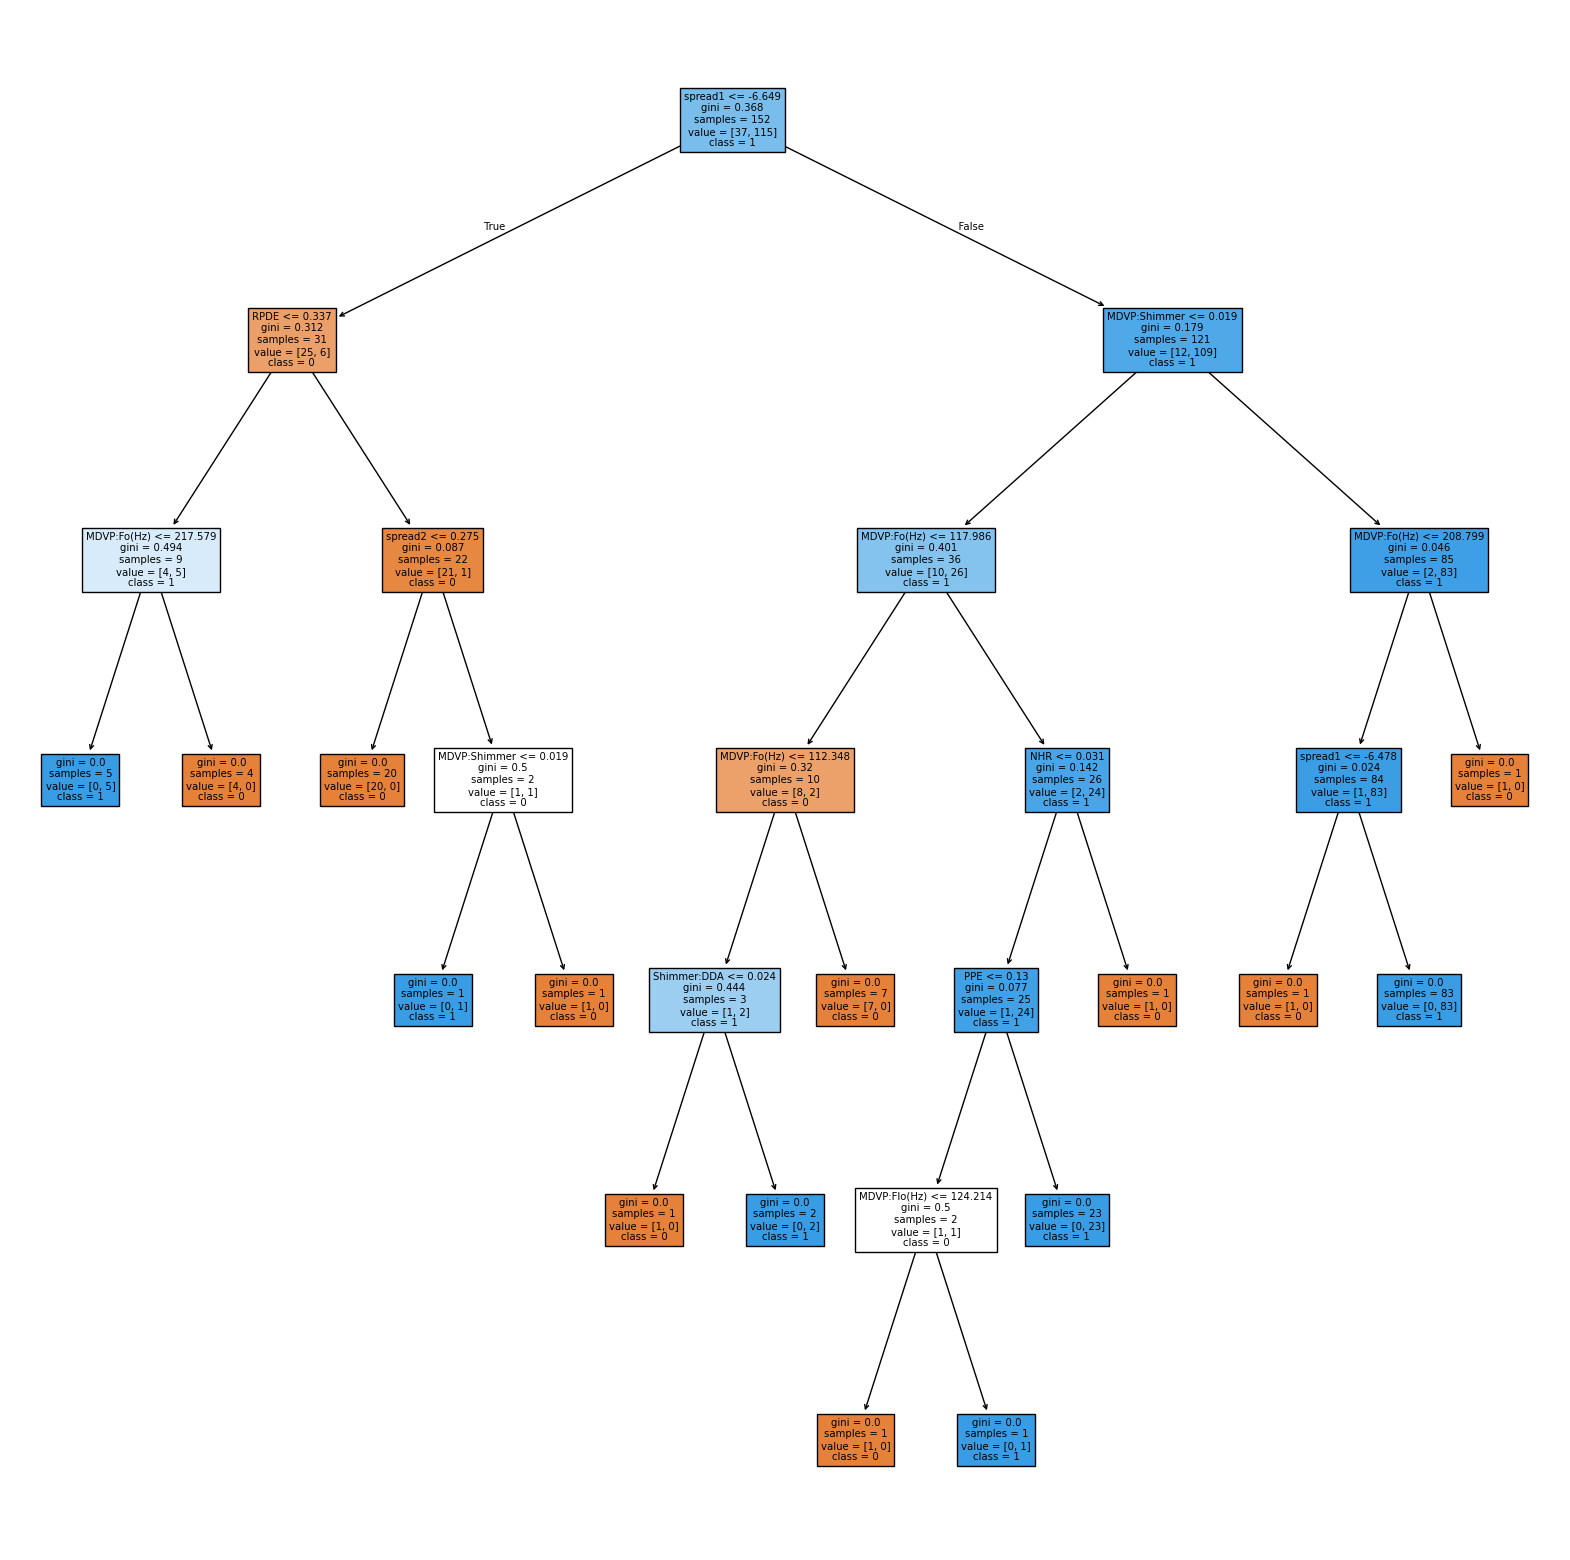

<Figure size 640x480 with 0 Axes>

In [80]:
clf2 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100)
clf2.fit(X_train, y_train)

val_accuracy2 = clf2.score(X_val, y_val)

print(f"The Accuracy of the Decision Tree2 on the Validation Set: {val_accuracy2}")

plt.figure(figsize=(20,20))

plot_tree(clf2, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()
plt.savefig("decision_tree_1.png")

In [81]:
clf2_params = clf2.get_params()
clf2_params


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

By comparing the graphs plotted above for clf1 and clf2 we can see that the difference lies in the order that the features are chosen to split. The reason for the decreased accuracy in clf2 is because of the features that have been chosen by the model. The dataset contains features that have 0% feature importance as shown previously. Hence, there is a chance of the model selecting a feature that has no importance to be split. This is exactly what has happened in clf2, which has resulted in the drop of accuracy from 89.5% to 84.21% (from clf1 to clf2). 

The longest paths in clf1 and clf2 are as follows: 

- CLF1: spread1 >> MDVP:Shimmer >> MDVP:Fo(Hz) >> MDVP:Shimmer(dB) >> RPDE >> spread1 (leaf)

- CLF2: spread1 >> MDVP:Shimmer >> MDVP:Fo(Hz) >> NHR >> PPE >> MDVP:Flo(Hz) (leaf)

According to the feature importance dataframe, shown previously, CLF1 has chosen features with a higher feature importance value throughout the path whereas CLF2 has chosen features with lesser feature importance. From the 4th feature onwards, CLF1 has chosen MDVP:Shimmer(dB) >> RPDE >> spread1 that have feature importance of 0, 0.0593, 0.476 respectively. CLF2 has chosen NHR >> PPE >> MDVP:Flo(Hz) that have a feature importance of 0.0316, 0.0342, 0 respectively. 

**All in all, CLF1 has chosen features that have a higher overall feature importance as compared to CLF2, hence, having a higher accuracy than CLF2.**

Therefore, in order to improve the accuracy, in the next round, we can remove the columns with 0 feature importance from X_train and X_validation to see if this improves the model.

### Fine Tuning Round 3

In [20]:
#drop columns with 0 feature importance
no_impt_ft = list(impt_features_df[impt_features_df['feature_importance'] == 0.0]['feature'])

X_train1 = X_train.drop(columns=no_impt_ft)
X_val1 = X_val.drop(columns=no_impt_ft)
X_test1 = X_test.drop(columns=no_impt_ft)

print(f"X_train1 shape: {X_train1.shape}")
print(f"X_test1 shape: {X_test1.shape}")
print(f"X_val1 shape: {X_val1.shape}")


NameError: name 'impt_features_df' is not defined

The Accuracy of the Decision Tree3 on the Validation Set: 0.9473684210526315


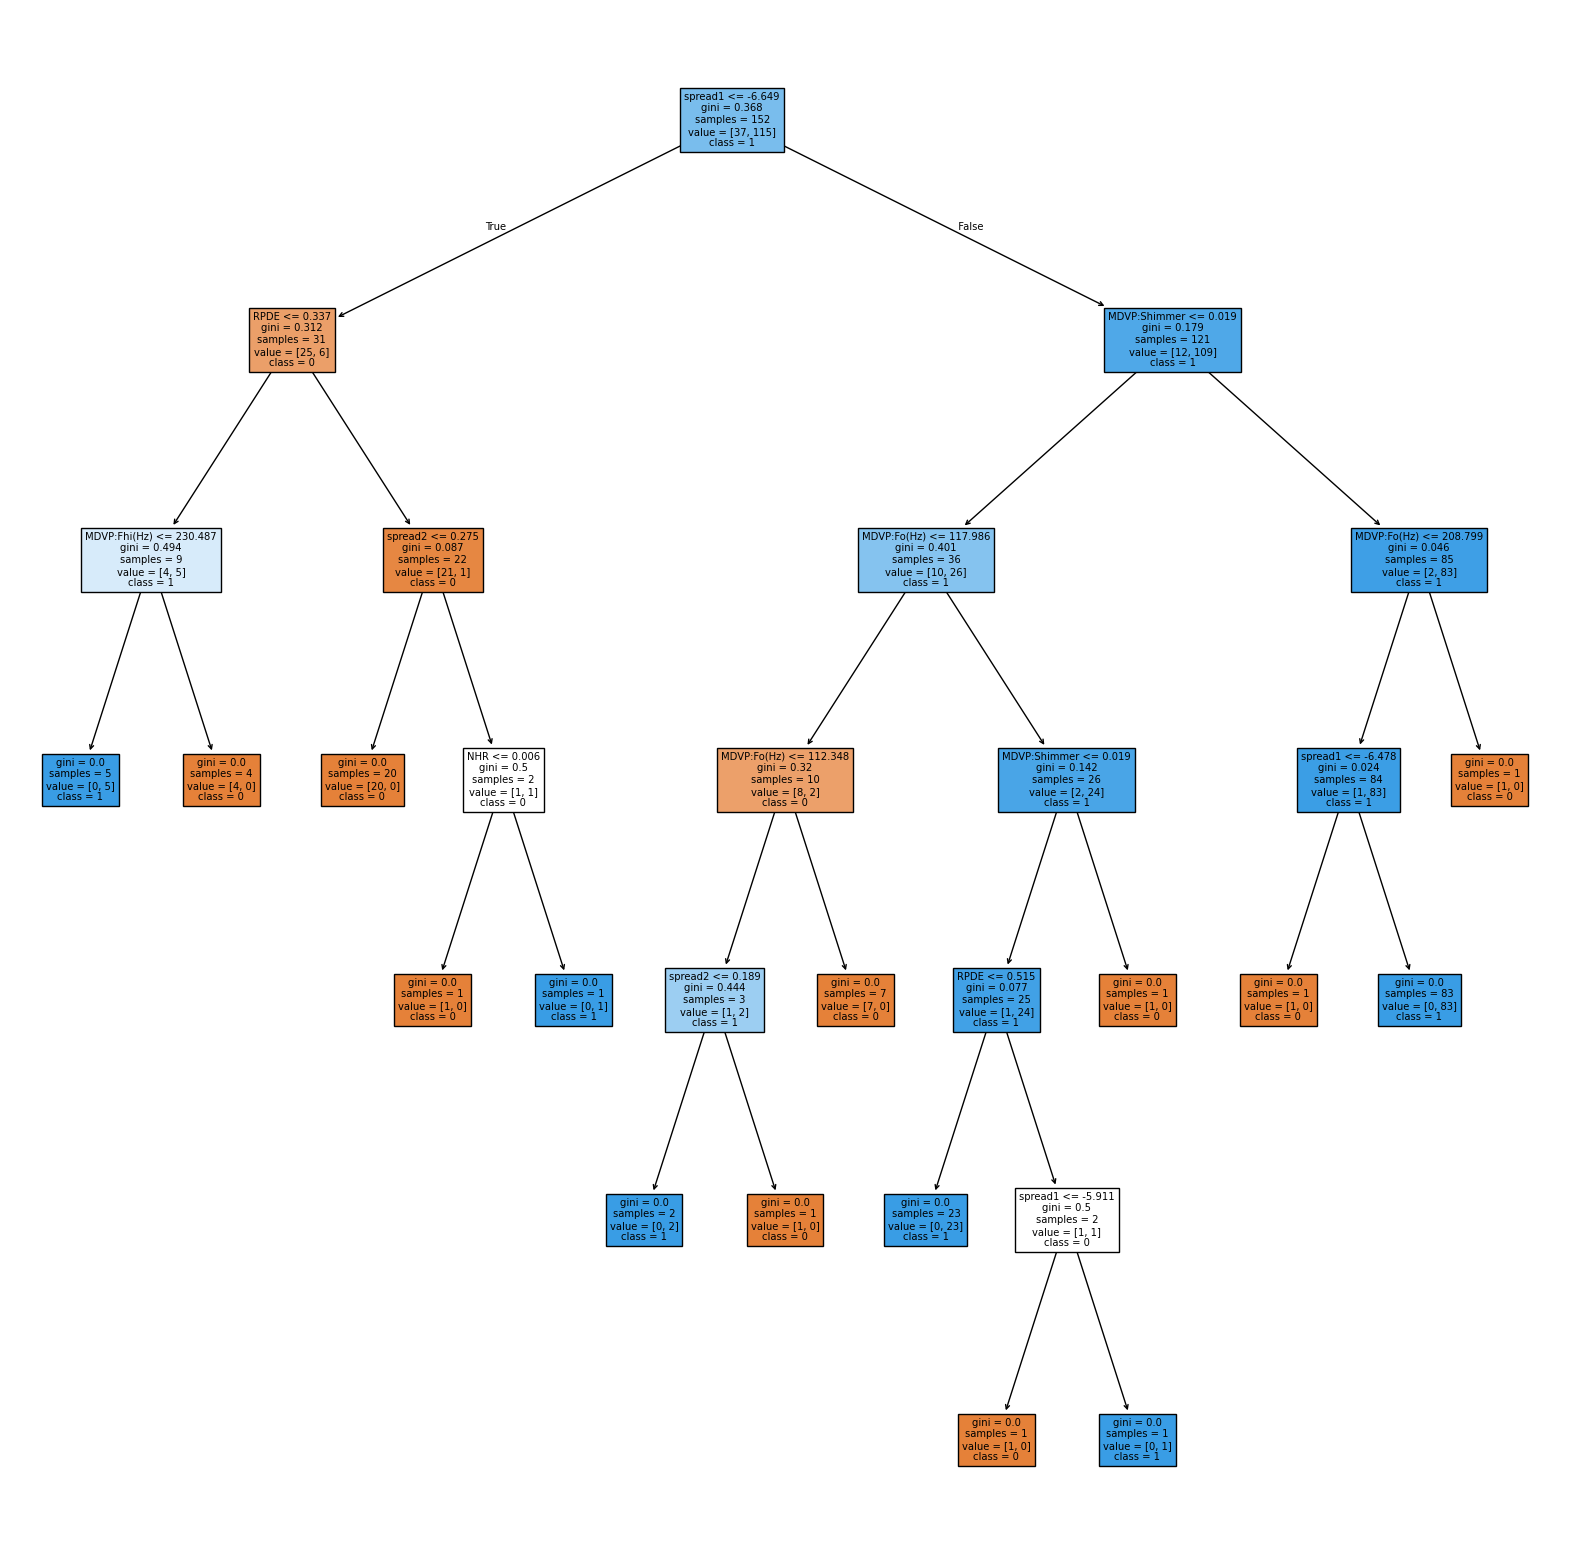

<Figure size 640x480 with 0 Axes>

In [101]:
#building the decision tree model based on the removed not important features 

clf3 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100)
clf3.fit(X_train1, y_train)

val_accuracy3 = clf3.score(X_val1, y_val)

print(f"The Accuracy of the Decision Tree3 on the Validation Set: {val_accuracy3}")

plt.figure(figsize=(20,20))

plot_tree(clf3, feature_names=list(clf3.feature_names_in_), class_names=['0', '1'], filled=True)
plt.show()
plt.savefig("decision_tree_3.png")

In [107]:
#saving clf3
#saving the model as there was an accuracy increase
# Save the model to a file
with open('decision_tree3_model.pkl', 'wb') as file:
    pickle.dump(clf3, file)

After removing the features that have zero importance, we can see a spike in the accuracy of the model from 89.5% to 94.7% on the validation set. The best model on the validation set after fine tuning is clf3. Hence, we can finally test it on the test set that has data that the model has never seen before.

In [139]:
#Running on the Test Data
#test on test

test_accuracy = clf3.score(X_test1, y_test)

preds = clf3.predict(X_test1)
dt_accuracy = accuracy_score(y_test, preds)
dt_report = classification_report(y_test, preds)

print(f"The decision tree accuracy is {dt_accuracy} \n")
print(f"The decison tree classification report is \n\n {dt_report}")

The decision tree accuracy is 0.8421052631578947 

The decison tree classification report is 

               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.81      0.90        16

    accuracy                           0.84        19
   macro avg       0.75      0.91      0.78        19
weighted avg       0.92      0.84      0.86        19



There is a drop in the accuracy when we test the model on the test set containing unseen data. From the above classification report, we can see that the problem lies in the f1-scores of the '0' class (Healthy). Upon looking at the dataset variation, we can see that the parkinsons dataset was skewed towards the '1' class (parkinsons' disease). The dataset has more rows with status = 1 than status = 0. As a result of which, the model sees the data instances with status = 1 more than status = 0. Therefore, it is pretty good at predicting status = 1 instances, but does not perform very well on the status = 0 data instances. Hence, to account for this we can add in the parameter 'class_weight = balanced' to ensure that the class with fewer rows is assigned more weightage in order to balance the learning.

### Fine Tuning Round 4

The Accuracy of the Decision Tree4 on the Validation Set: 0.9473684210526315


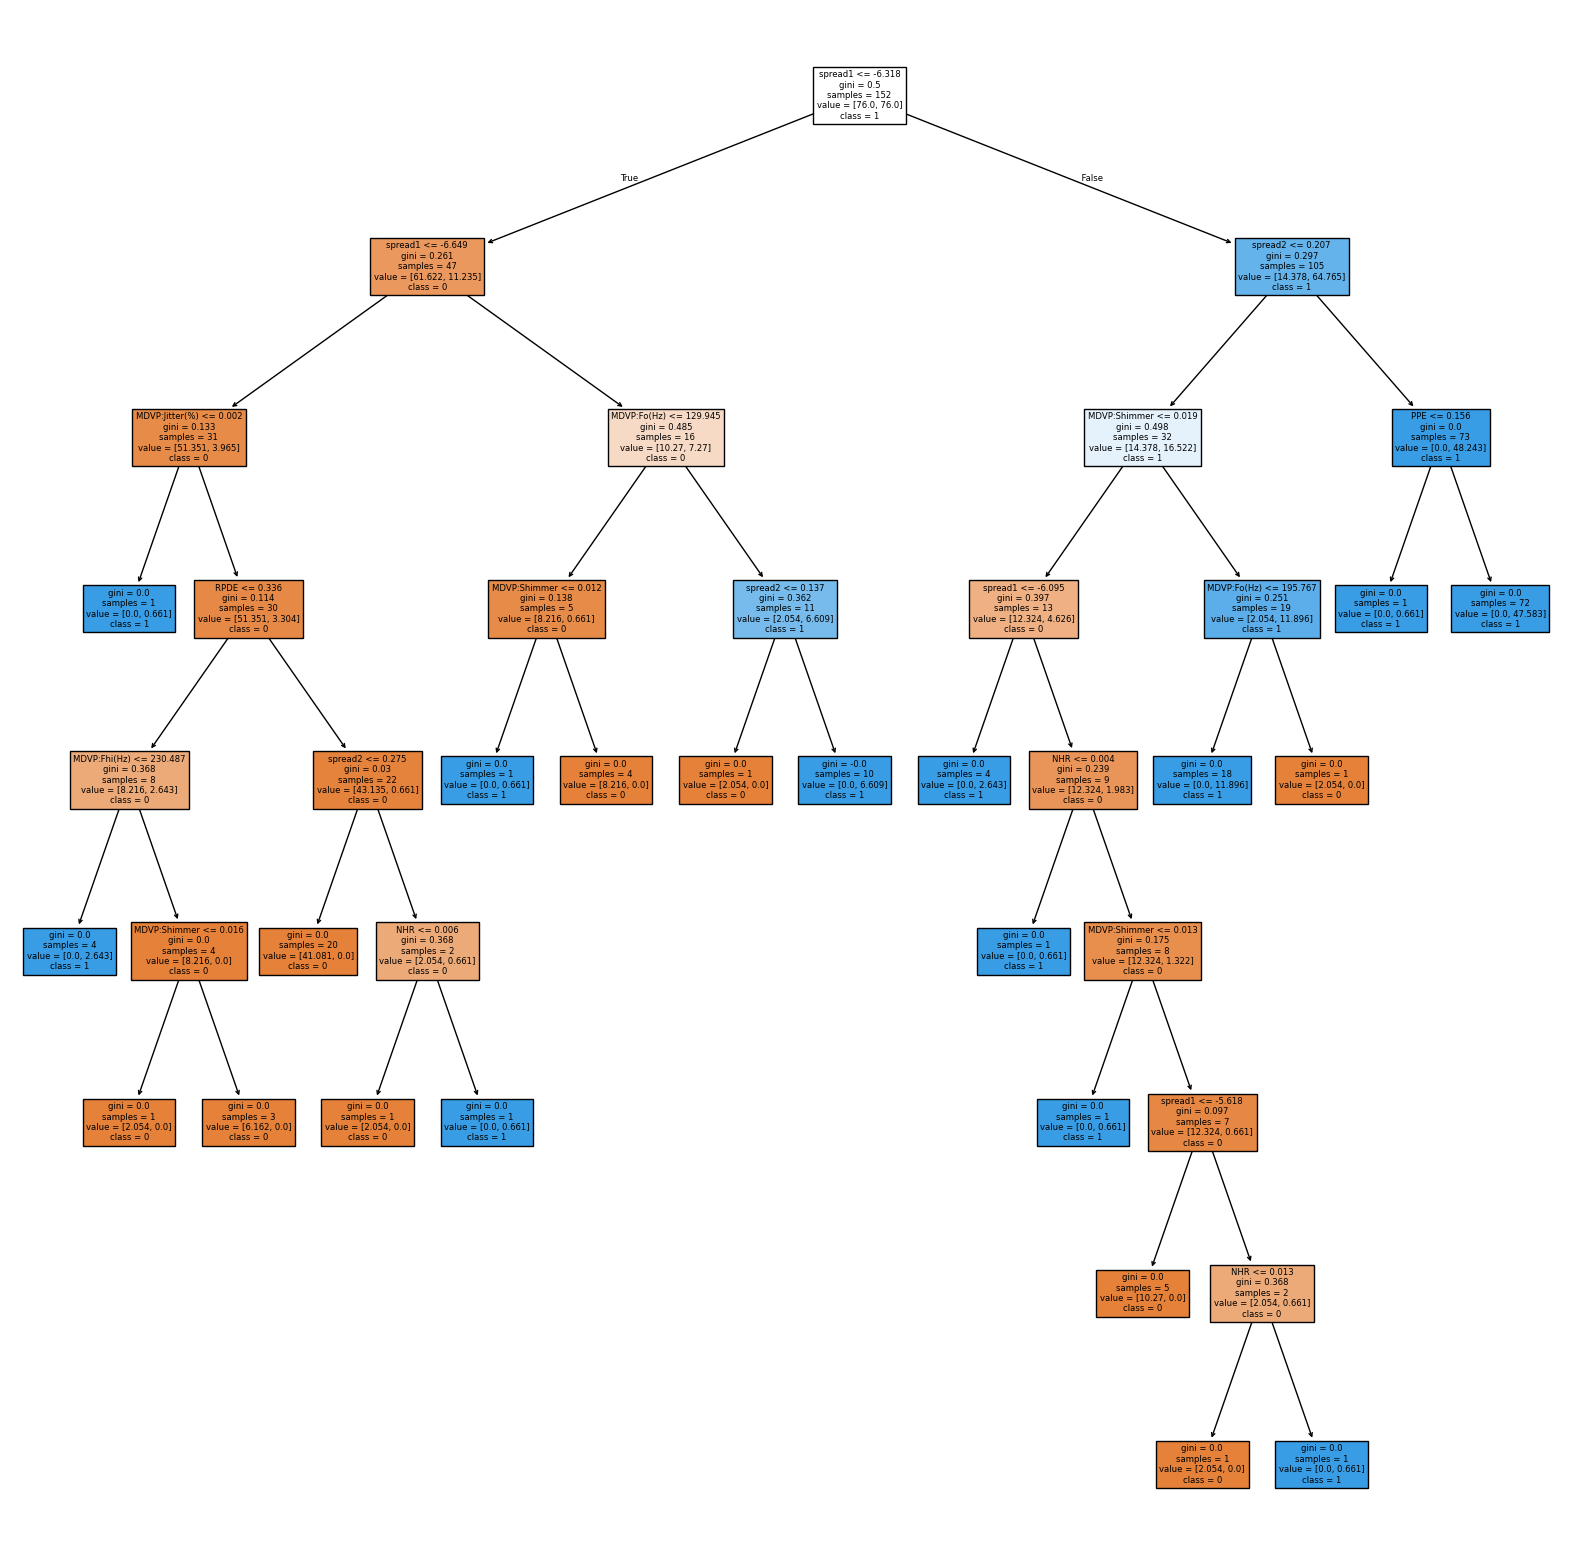

<Figure size 640x480 with 0 Axes>

In [134]:
#building the decision tree model based on the removed not important features 

clf4 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100, max_features=5, class_weight='balanced')
clf4.fit(X_train1, y_train)

val_accuracy4 = clf4.score(X_val1, y_val)

print(f"The Accuracy of the Decision Tree4 on the Validation Set: {val_accuracy4}")

plt.figure(figsize=(20,20))

plot_tree(clf4, feature_names=list(clf4.feature_names_in_), class_names=['0', '1'], filled=True)
plt.show()
plt.savefig("decision_tree_4.png")

In [140]:
#test on test

test_accuracy = clf4.score(X_test1, y_test)
print(f"The Accuracy of the Decision Tree4 on the Test Set: {test_accuracy}")


The Accuracy of the Decision Tree4 on the Test Set: 0.8947368421052632


In [141]:
preds = clf4.predict(X_test1)
dt_accuracy = accuracy_score(y_test, preds)
dt_report = classification_report(y_test, preds)

print(f"The decision tree accuracy is {dt_accuracy} \n")
print(f"The decison tree classification report is \n\n {dt_report}")


The decision tree accuracy is 0.8947368421052632 

The decison tree classification report is 

               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.88      0.93        16

    accuracy                           0.89        19
   macro avg       0.80      0.94      0.84        19
weighted avg       0.94      0.89      0.90        19



The fine-tuned model clf4 has the parameter class_weights = 'balanced'. This allows the model to take into account the uneven number of rows of status = 1 and status = 0. Having this parameter really improves the accuracy, as we can see that the f1-score for the class 0 has increased to a 75%. Limiting the max_number_of_features to a 5 also has improved the accuracy. 

However, there still is a drop in the accuracy from the validation set performance to the test set performance due to the imbalanced dataset, as shown below. The Train set has 115 rows where status = 1 and only 37 rows where status = 0. Hence, to overcome the imbalanced dataset, SMOTE (a resampling technique) will be implemented. 

In [143]:
y_train['status'].value_counts()

status
1    115
0     37
Name: count, dtype: int64

In [132]:
y_val['status'].value_counts()

status
1    13
0     6
Name: count, dtype: int64

In [133]:
y_test['status'].value_counts()

status
1    16
0     3
Name: count, dtype: int64

## Implementing SMOTE

SMOTE: 

In [144]:
smote = SMOTE(random_state=42)

X_train2, y_train2 = smote.fit_resample(X_train1, y_train)

print(f"X_train2 shape: {X_train2.shape}")
print(f"y_train2 shape: {y_train2.shape}")



X_train2 shape: (230, 9)
y_train2 shape: (230, 1)


In [145]:
y_train2['status'].value_counts()

status
1    115
0    115
Name: count, dtype: int64

# Ensemble Methods

## Random Forest Model

In [178]:
#RandomForest Model 

rclf = RandomForestClassifier()
rclf.fit(X_train2, y_train2)

RandomForestClassifier()

In [179]:
# Getting the Accuracy Report

# Run on Validation Set

rf_val_accuracy = rclf.score(X_val1, y_val)

# print(f"The Accuracy of the Model on the Random Forest Validation Set: {rf_val_accuracy}")

rf_preds = rclf.predict(X_val1)

rf_accuracy = accuracy_score(y_val, rf_preds)
rf_report = classification_report(y_val, rf_preds)

print(f"The Random Forest Classification is {rf_accuracy}")
print(f"The Random Forest Classification report is: \n\n {rf_report}")



The Random Forest Classification is 0.8947368421052632
The Random Forest Classification report is: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.87      1.00      0.93        13

    accuracy                           0.89        19
   macro avg       0.93      0.83      0.86        19
weighted avg       0.91      0.89      0.89        19



### Hyperparameter Tuning with GridSearchCV

In [181]:
rclf_params = rclf.get_params()
rclf_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [183]:
parameter_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}


gridSearch = GridSearchCV(estimator=rclf, param_grid=parameter_grid, cv=5, scoring='accuracy', n_jobs=1)
gridSearch.fit(X_val1, y_val)

bestParameters = gridSearch.best_params_
print(f"Best Parameters for the model are: {bestParameters}")

best_model = gridSearch.best_estimator_
rfcl_accuracy = accuracy_score(y_val, best_model.predict(X_val1))
rf_report = classification_report(y_val, best_model.predict(X_val1))

print(f"The Random Forest Classification is {rfcl_accuracy}")
print(f"The Random Forest Classification report is: \n\n {rf_report}")

Best Parameters for the model are: {'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
The Random Forest Classification is 0.9473684210526315
The Random Forest Classification report is: 

               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.96        13

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19



In [197]:
#save the model 

with open('Models/Random_Forest/random_forest.pkl', 'wb') as file:
    pickle.dump(rclf, file)


In [195]:
parameter_grid1 = {'bootstrap': [True, False],
 'ccp_alpha': [0.0, 1.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini'],
 'max_depth': [8, 10, 12, 20],
 'max_features': ['sqrt'],
 'max_leaf_nodes': [50, 100, 150, 200],
 'max_samples': [0.0, 1.0],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'min_weight_fraction_leaf': [0.0],
 'monotonic_cst': [None],
 'n_estimators': [100, 200, 500],
 'n_jobs': [1,2,5],
 'oob_score': [False, True],
 'random_state': [None],
 'verbose': [0],
 'warm_start': [False, True]
}

gridSearch1 = GridSearchCV(estimator=rclf, param_grid=parameter_grid1, cv=5, scoring='accuracy', n_jobs=1)
gridSearch1.fit(X_val1, y_val)

bestParameters1 = gridSearch1.best_params_
print(f"Best Parameters for the model are: {bestParameters1}")

best_model1 = gridSearch1.best_estimator_
rfcl_accuracy1 = accuracy_score(y_val, best_model1.predict(X_val1))
rf_report1 = classification_report(y_val, best_model1.predict(X_val1))

print(f"The Random Forest Classification is {rfcl_accuracy1}")
print(f"The Random Forest Classification report is: \n\n {rf_report}")

Best Parameters for the model are: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'max_samples': 1.0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
The Random Forest Classification is 0.9473684210526315
The Random Forest Classification report is: 

               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.96        13

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19



In [196]:
rf_preds = rclf.predict(X_test1)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

print(f"The Random Forest Classification is {rf_accuracy}")
print(f"The Random Forest Classification report is: \n\n {rf_report}")

The Random Forest Classification is 0.9473684210526315
The Random Forest Classification report is: 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.94      0.97        16

    accuracy                           0.95        19
   macro avg       0.88      0.97      0.91        19
weighted avg       0.96      0.95      0.95        19



## Bagging Classifier

In [6]:
# Bagging Classifier

bag_clf = BaggingClassifier()



NameError: name 'X_train' is not defined